# Part 2: The Fourier Transform and the Frequency Domain

## The "recipe" for a signal

In the previous section, we discussed how signals can be composed of multiple sine waves. We can use a tool called the Fourier Transform to decompose a signal into its constituent sine waves.

Lets look at an example of a synthetic signal composed of four sine waves of varying frequencies:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')
font = {'size': 18}

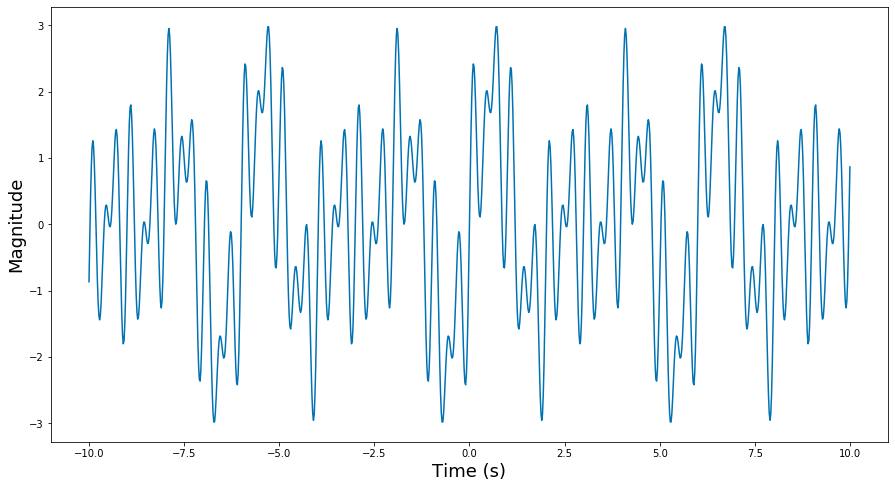

In [2]:
f = [1/3, 1/2, 2, 3]
n_samples = 1001
x = np.linspace(-10, 10, n_samples)
y = [np.sin(x * freq * (2 * np.pi)) for freq in f] 
y = np.sum(y, axis=0)

# Plot
plt.figure(figsize=(15,8))
plt.xlabel('Time (s)', fontdict=font)
plt.ylabel('Magnitude', fontdict=font)
plt.plot(x,y);

And now lets look at how we can use `scipy.fftpack.fft` to identify the individual sine wave components used to create the synthic signal. FFT stands for "Fast Fourier Transform", which is an implementation of a discrete Fourier transform (vs. continuous, because we are dealing with samples of a signal, not a continuous function).

The FFT allows us to view a signal in its Frequency Domain, rather than the more intuitive Time Domain:

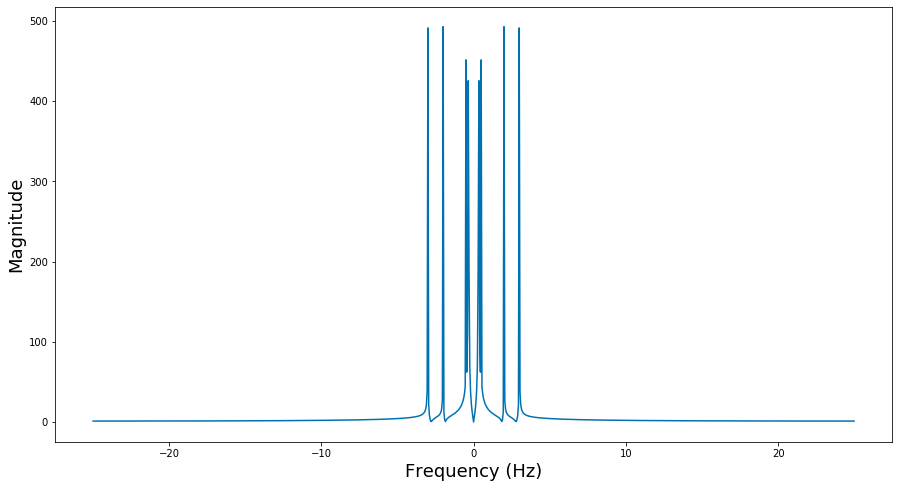

In [3]:
from scipy.fftpack import fft, fftfreq, fftshift

freq_y = fftshift(np.abs(fft(y))) # fft, with centered origin
freq_x = fftshift(fftfreq(x.size, x[1] - x[0])) # find frequencies of fft

# Plot
plt.figure(figsize=(15, 8))
plt.xlabel('Frequency (Hz)', fontdict=font)
plt.ylabel('Magnitude', fontdict=font)
plt.plot(freq_x, freq_y);

In this new plot, the x-axis is If you look carefully, you can see eight spikes in that plot. These are more obvious if you zoom in:

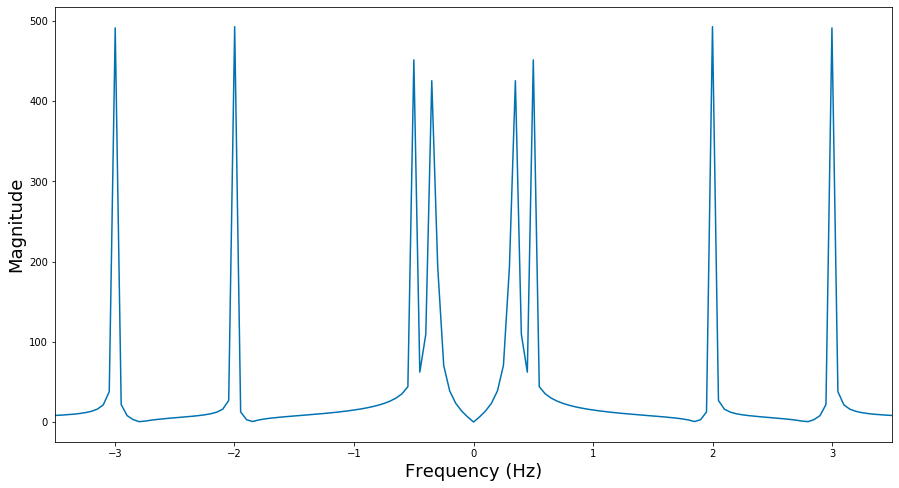

In [4]:
plt.figure(figsize=(15, 8))
plt.xlabel('Frequency (Hz)', fontdict=font)
plt.ylabel('Magnitude', fontdict=font)
plt.xlim(-3.5, 3.5)
plt.plot(freq_x, freq_y);

Now you can notice that the eight peaks are located at exactly the frequencies of the sine waves we used to create the synthetic signal (as well as the corresponding negative values). We can obtain the exact values of all peaks:

In [5]:
from scipy.signal import find_peaks

peaks = find_peaks(freq_y)
peak_coords = freq_x[peaks[0]]
print(peak_coords)

[-2.997003   -1.998002   -0.4995005  -0.34965035  0.34965035  0.4995005
  1.998002    2.997003  ]


Note that the output we are looking at so far is just frequency information (actually, the magnitude of a sine wave component at a particular frequency). There is no phase information in the peaks as they have been plotted. So lets go back to our original synthetic signal and shift our sine waves with respect to the origin.

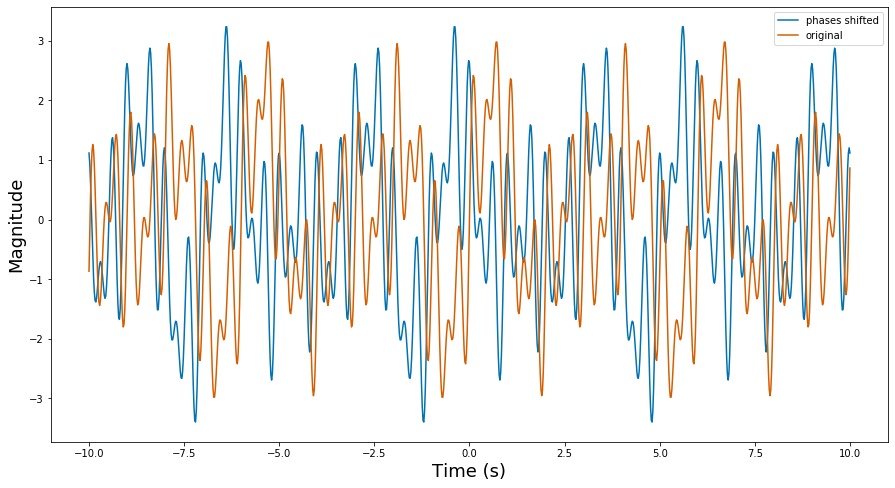

In [6]:
f = [1/3, 1/2, 2, 3]
phase_shifts = [(np.pi * 0.5),(np.pi),(np.pi * 0.3),(np.pi * 0.7)]
y2 = [np.sin((x * freq * (2 * np.pi)) + phase) for freq, phase in zip(f, phase_shifts)] 
y2 = np.sum(y2, axis=0)

# Plot
plt.figure(figsize=(15,8))
plt.xlabel('Time (s)', fontdict=font)
plt.ylabel('Magnitude', fontdict=font)
plt.plot(x,y2, label='phases shifted')
plt.plot(x,y, label='original', color='C2')
plt.legend();

This signal thus contains the same frequencies as the first example, but those frequencies are phased differently, so the signals look quite different. Now lets take a look at the fourier transform of the phase-shifted example:

[-2.997003   -1.998002   -0.4995005  -0.34965035  0.34965035  0.4995005
  1.998002    2.997003  ]


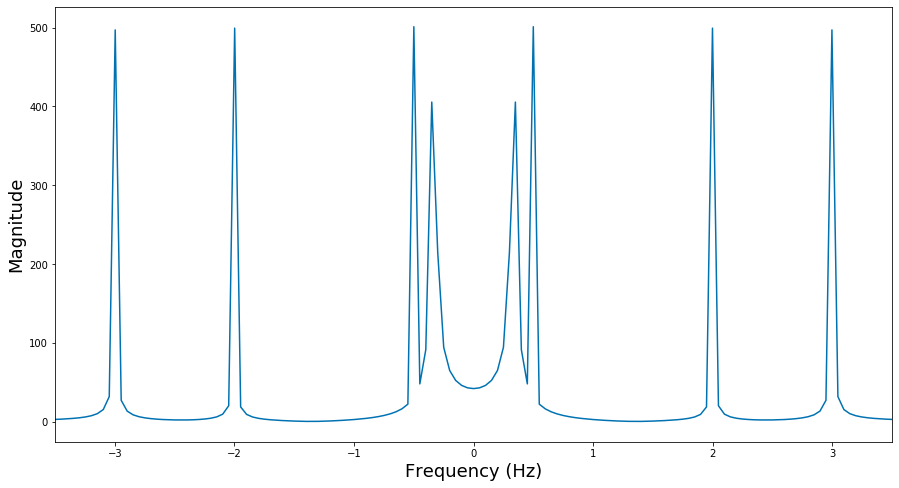

In [7]:
freq_y2 = fftshift(np.abs(fft(y2)))

# Plot
plt.figure(figsize=(15, 8))
plt.xlabel('Frequency (Hz)', fontdict=font)
plt.ylabel('Magnitude', fontdict=font)
plt.xlim(-3.5, 3.5)
plt.plot(freq_x, freq_y2)
peaks2 = find_peaks(freq_y2)
peak_coords2 = freq_x[peaks2[0]]
print(peak_coords2)

As you can see, the FFT gives us the magnitudes of the consituent frequencies of a signal regardless of the phase of those frequencies. Actually, the FFT *also* gives us phase information!

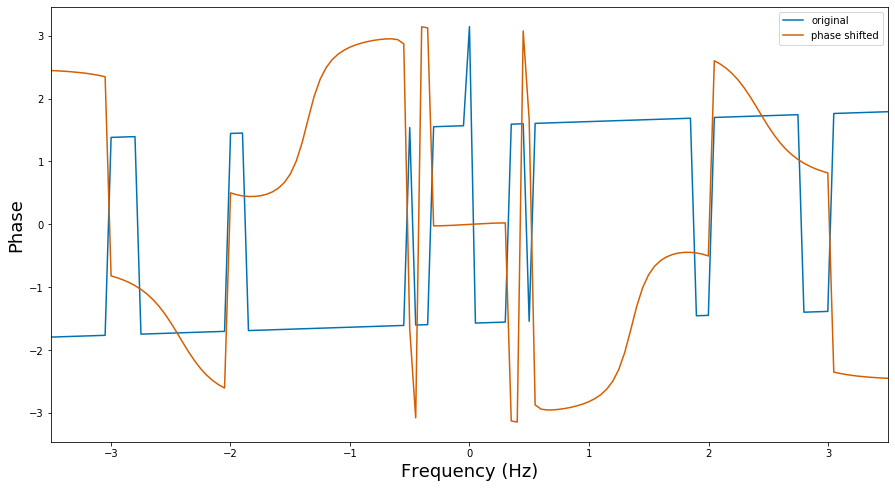

In [8]:
# getting phase information
p = fftshift(np.angle(fft(y)))
p2 = fftshift(np.angle(fft(y2)))

# Plot
plt.figure(figsize=(15, 8))
plt.xlabel('Frequency (Hz)', fontdict=font)
plt.ylabel('Phase', fontdict=font)
plt.xlim(-3.5, 3.5)
plt.plot(freq_x, p, label='original')
plt.plot(freq_x, p2, label='phase shifted', color='C2')
plt.legend();

This plot looks a little crazy, but what we really want are the phase values *at the magnitude peaks*.

In [9]:
# negative phase (phase between π and 2π) needs to be converted

phases = p[peaks[0]] % (np.pi * 2)

phases2 = p2[peaks2[0]] % (np.pi * 2)

diffs = np.array(phases2) - np.array(phases)

phase_diffs = diffs[4:] % (np.pi * 2) # we only want the positive peaks

print('Phases shifts we specified:', phase_shifts)
print('Values returned from FFT:', phase_diffs)

Phases shifts we specified: [1.5707963267948966, 3.141592653589793, 0.9424777960769379, 2.199114857512855]
Values returned from FFT: [1.56751328 3.2036844  0.94398816 2.20086364]


Notice the values are a bit off. This is expected and shouldn't cause you any concern right now (an explanation requires a bit more math and theory that won't be covered in this lesson). Nonetheless, the information that the FFT *does* return is perfectly sufficient to recreate the original signal:

/anaconda3/envs/signals/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


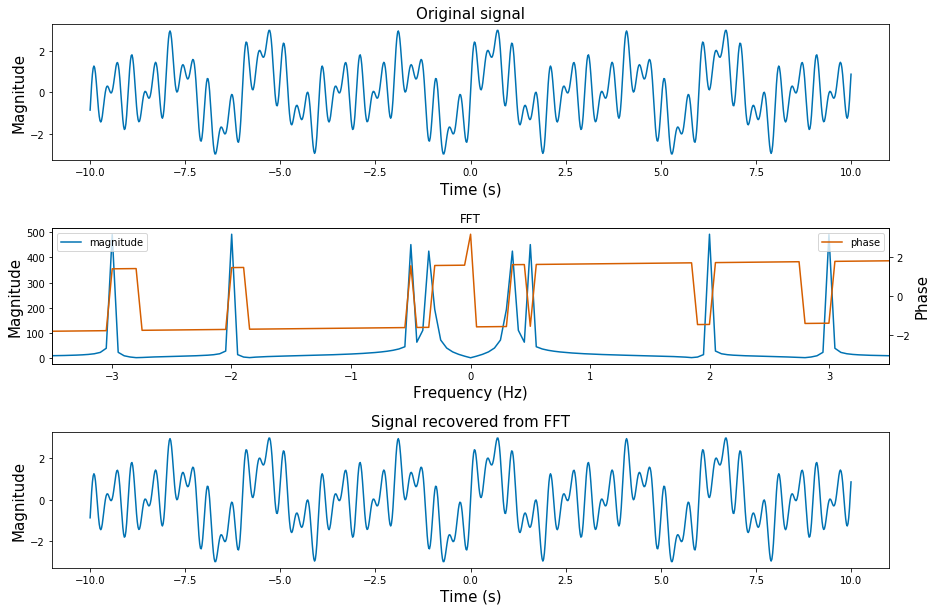

In [10]:
from scipy.fftpack import ifft, ifftshift

y_fft = fftshift(fft(y))
y_from_fft = ifft(ifftshift(y_fft))

# Plot
fig, ax = plt.subplots(nrows=3, figsize=(15,10))
fig.subplots_adjust(hspace=.5)
font = {'size': 15}

# Top plot
ax[0].plot(x, y)
ax[0].set_title('Original signal', fontdict=font)
ax[0].set_xlabel('Time (s)', fontdict=font)
ax[0].set_ylabel('Magnitude', fontdict=font)

# Middle plot
ax[1].set_xlim(-3.5, 3.5)
ax[1].set_xlabel('Frequency (Hz)', fontdict=font)
ax[1].set_ylabel('Magnitude', fontdict=font)
ax[1].plot(freq_x, np.abs(y_fft), label='magnitude')
ax[1].set_title('FFT')
ax[1].legend(loc=2)
ax_share = ax[1].twinx()
ax_share.plot(freq_x, np.angle(y_fft), color='C2', label='phase')
ax_share.legend(loc=1)
ax_share.set_ylabel('Phase', fontdict=font)

# Bottom plot
ax[2].plot(x, y_from_fft)
ax[2].set_title('Signal recovered from FFT', fontdict=font)
ax[2].set_xlabel('Time (s)', fontdict=font)
ax[2].set_ylabel('Magnitude', fontdict=font);

At this point you might be wondering why `fftshift`, `np.angle` and `np.abs` are necessary for working with our FFTs. We will go over this shortly.

First, lets take a look at a *real* signal to demonstrate the true power of the FFT. [This signal](https://www.kaggle.com/swayammittal65/wearable-motion-sensors/) comes from an accelerometer being worn by someone who is walking at a steady pace (such accelerometers are found in smart watches, smart phones, and fitness devices). This particular accelerometer is taking an instantaneous measure of acceleration roughly every 0.02065 seconds:

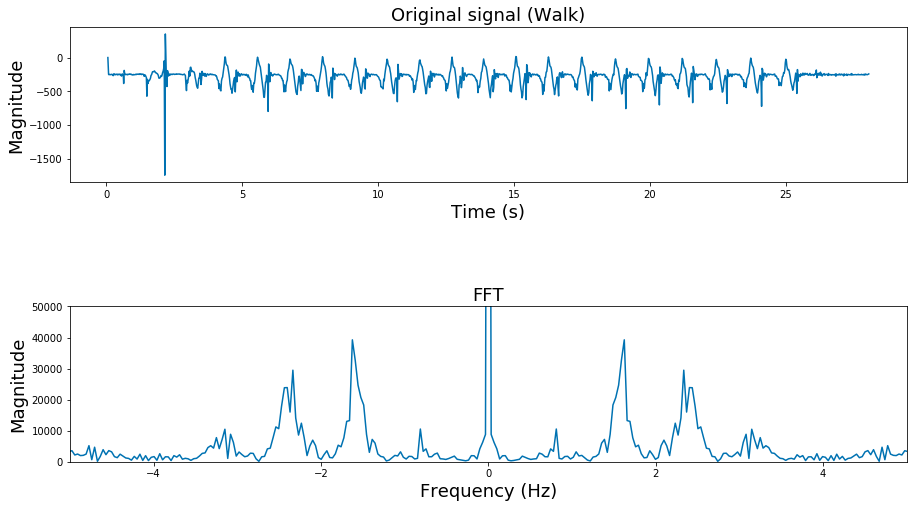

In [11]:
import pandas as pd

# real signal from accelerometer
walk = pd.read_csv('../data/walk1.csv', header = None)
walk.columns = ['x', 'y', 'z', 't']
walk.t = walk.t/1000 # convert ms to s
freq_walk_t = fftshift(fftfreq(walk.t.size, 0.02065))
x_fft = fftshift(fft(walk.x))


# Plot
fig, ax = plt.subplots(nrows=2, figsize=(15,8))
fig.subplots_adjust(hspace=.8)
font = {'size': 18}

# Top plot
ax[0].plot(walk.t, walk.x)
ax[0].set_title('Original signal (Walk)', fontdict=font)
ax[0].set_xlabel('Time (s)', fontdict=font)
ax[0].set_ylabel('Magnitude', fontdict=font)

# Bottom plot
ax[1].plot(freq_walk_t, np.abs(x_fft))
ax[1].set_title('FFT', fontdict=font)
ax[1].set_xlabel('Frequency (Hz)', fontdict=font)
ax[1].set_ylabel('Magnitude', fontdict=font)
# Changing scale on FFT to help see the peaks
# Try playing with the values
ax[1].set_ylim((-10, 50000))
ax[1].set_xlim((-5, 5));


As you have probably guessed by now, FFTs can be used to analyze real signals. This is because *all signals* can be described as a combination of sine waves! Of course, unlike our synthetic signal, the frequency representation of our real signal is much noiser, so the peaks are a little messier and spread out. 

Nonetheless, we see peaks, and they are meaningful! Indeed, the FFT can be used to identify regular, repeating patterns in our real signals. For example, we see that there are peaks of magnitude in the frequency spectrum roughly around 0.75 Hz, 1.75 Hz, 2.3 Hz and 3 Hz. Looking at the accelerometer signal, this makes sense. There appears to be a repeating pattern that occurs 18 times over 25 seconds (0.72 Hz), with many smaller motions that occur during each cycle. 

Now lets take a look at an example of signals taken from an accelerometer during running:

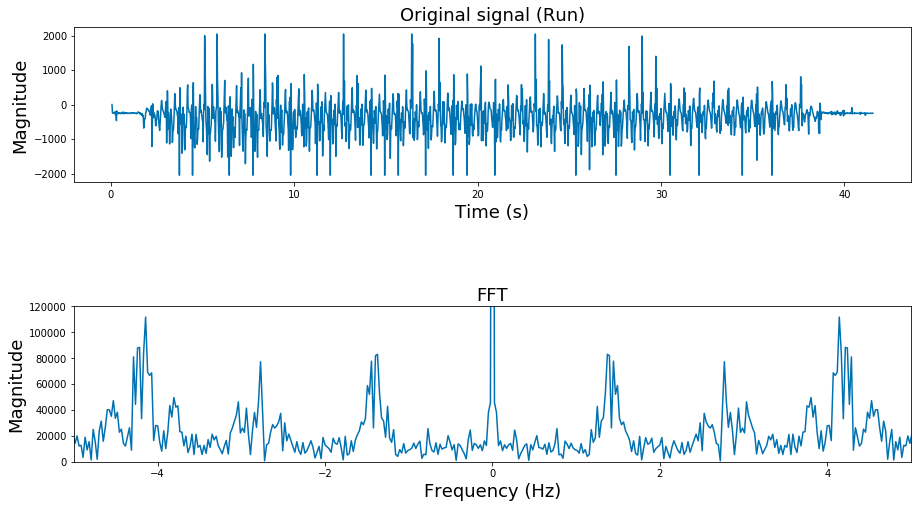

In [12]:
run = pd.read_csv('../data/run1.csv', header = None)
run.columns = ['x', 'y', 'z', 't']
run.t = run.t/1000 # convert ms to s
freq_run_t = fftshift(fftfreq(run.t.size, 0.02065))
x_fft = fftshift(fft(run.x))

# Plot
fig, ax = plt.subplots(nrows=2, figsize=(15,8))
fig.subplots_adjust(hspace=.8)

# Top plot
ax[0].plot(run.t, run.x)
ax[0].set_title('Original signal (Run)', fontdict=font)
ax[0].set_xlabel('Time (s)', fontdict=font)
ax[0].set_ylabel('Magnitude', fontdict=font)

# Bottom plot
ax[1].plot(freq_run_t, np.abs(x_fft))
ax[1].set_xlabel('Frequency (Hz)', fontdict=font)
ax[1].set_ylabel('Magnitude', fontdict=font)

# Changing scale on FFT to help see the peaks
# Try playing with the values
ax[1].set_ylim((-10, 120000))
ax[1].set_xlim((-5, 5))
ax[1].set_title('FFT', fontdict=font);

In the run signal, you can see that the first peak occurs at a higher frequency than in the run signal (closer to 1.5 Hz), and in general the "energy" of the signal is moved out to higher frequncies.

Now lets dive deeper into the FFT to determine what exactly is going on!

## Using the FFT in Python

Now lets take a step back to go over all of the FFT-related functions we used above. First, lets take a look at the first few raw values of an FFT:

In [13]:
# Make a wave
f = 1/2
n_samples = 1000
x = np.linspace(-10, 10, n_samples)
y = np.sin(x * f * (2 * np.pi))

# Take the fft
fy = fft(y)
print(fy[0:5])

[-6.56141808e-14+0.j          3.16904350e-04-0.10087346j
  1.30714797e-03-0.20803632j  3.10232599e-03-0.32915726j
  5.97375675e-03-0.47535143j]


The values returned by the FFT probably don't look like any type of number you are accustomed to working with in Python. In fact, these are *complex numbers*, which include a *real part* and an *imaginary part*. Recall the difference between real and imaginary numbers:

**Real number:**  From [Wikipedia](https://en.wikipedia.org/wiki/Real_number), "a value of a continuous quantity that can represent a distance along a line." This is not a perfectly rigorous definition, but will suffice. The real numbers are the numbers we use to measure stuff and include $1$, $\pi$, 7.9, and $1.\overline{3}$.

**Imaginary number:** From [Wikipedia](https://en.wikipedia.org/wiki/Imaginary_number), a number, "that can be written as a real number multiplied by the imaginary unit $i$, which is defined by its property $i^2 = −1$." Note that in Python we use $j$ instead of $i$ for $\sqrt{-1}$.

A complex number is represented as the sum of a real number and an imaginary number, although these aren't sums in the conventional sense. So the second value in our FFT output:

<center> $ 3.16904350 \times 10^{-04} - 0.10087346j$ </center>

Has a real part, $ 3.16904350 \times 10^{-04}$, and an imaginary part, $- 0.10087346j$.

The real and imaginary parts of a number in Python can be easily extracted:

In [14]:
print('Real part:', fy[1].real)
print('Imaginary part:', fy[1].imag)

Real part: 0.0003169043504144334
Imaginary part: -0.10087345582892156


Complex numbers can be reprented on the *complex plane*, which is a coordinate system that plots the real part of a number on one axis, and the imaginary part of a number of the second axis. And of course any point on the plane desribes a vector with a magnitude (i.e., distance from the origin) and angle (from 0 to 2$\pi$):

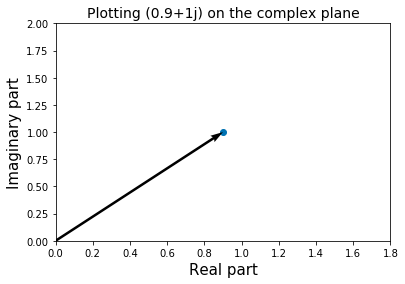

In [27]:
c_num = 0.9 + 1j # play with these values

# plot vector
plt.scatter(c_num.real, c_num.imag)
plt.quiver(0,0,c_num.real,c_num.imag, angles='xy', scale_units='xy', scale=1)


# might need to adjust these limits
plt.xlim((0,2 * c_num.real))
plt.ylim((0,2 * c_num.imag))

plt.title(f'Plotting {c_num} on the complex plane', fontdict={'size': 14})
plt.xlabel('Real part', fontdict=font)
plt.ylabel('Imaginary part', fontdict=font);

So we can actually obtain the magnitude and angle (phase) for a given FFT value by applying some trigonometry:

In [16]:
magnitude = np.sqrt(c_num.real**2 + c_num.imag**2)
angle = np.arctan(c_num.imag/c_num.real)

print(f'Complex value: {c_num}')
print(f'Magnitude: {magnitude}')
print(f'Angle: {angle}')

Complex value: (0.9+1j)
Magnitude: 1.3453624047073711
Angle: 0.83798122500839


Another simple way to get the magnitude of a complex number is to take its absolute value (actually, the absolute value of a complex number is literally defined as its magnitude in the complex plane!). Thus we use `np.abs` to return the magnitude of a complex number.

And `np.angle` will return $\arctan \large\frac{imaginary\ part}{real\ part}$ to return our phase information:

In [17]:
print(f'Magnitude: {np.abs(c_num)}')
print(f'Angle: {np.angle(c_num)}')

Magnitude: 1.3453624047073711
Angle: 0.83798122500839


You might be wondering, "Why represent the output of the FFT as a complex number rather than returning magnitude and phase information directly?" The answer has to do with the math behind how the FFT actually works. That requires a lot of explanation and won't be covered here, but you are encouraged to check out some additional resources about the FFT, and the Fourier Transform on which it is based:

 * [Wikipedia page](https://en.wikipedia.org/wiki/Fourier_transform)
 * [Video from 3Blue1Brown](https://www.youtube.com/watch?v=spUNpyF58BY)
 * [Interactive explanation on Better Explained](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

Not putting it all together, lets look at the first few values of the FFT of our simple sine wave `fy`:

In [18]:
print(f'fft output:\t {fy[:3]}')
print()
print(f'magnitudes:\t {np.abs(fy[:3])}')
print()
print(f'phases:\t {np.angle(fy[:3])}')

fft output:	 [-6.56141808e-14+0.j          3.16904350e-04-0.10087346j
  1.30714797e-03-0.20803632j]

magnitudes:	 [6.56141808e-14 1.00873954e-01 2.08040429e-01]

phases:	 [ 3.14159265 -1.56765473 -1.56451314]


And of course we can plot the original signal and FFT as in the examples above:

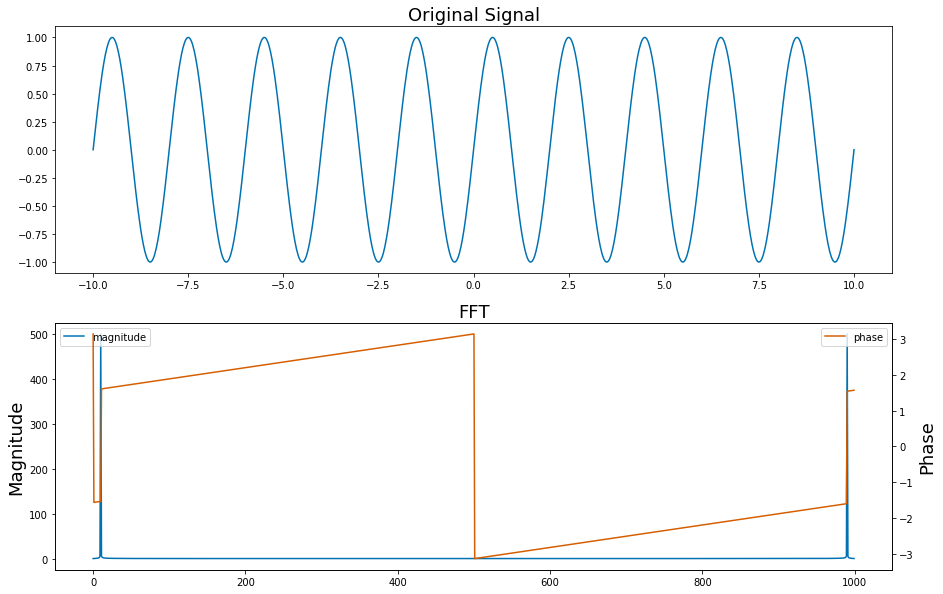

In [19]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))

# Top plot
ax[0].plot(x, y)
ax[0].set_title('Original Signal', fontdict=font)

# Bottom plot
ax[1].plot(np.abs(fy), label= 'magnitude')
ax[1].set_title('FFT', fontdict=font)
ax[1].legend(loc=2)
ax[1].set_ylabel('Magnitude', fontdict=font)
ax_share = ax[1].twinx()
ax_share.plot(np.angle(fy), color='C2', label='phase')
ax_share.legend(loc=1)
ax_share.set_ylabel('Phase', fontdict=font);

But this frequency domain doesn't look right! We expect to see a single peak to the right on the origin, and the corresponding "negative" peak, as in the examples above. In this case, both peaks are to the right of the origin, and they certainly don't seem to be indicating frequency.

This is why we use `fftshift` and `fftfreq`.

`fftshift` is used because `fft` returns values in a strange order: it first returns the zero-frequency component, and then all positive components in increasing order, then returns all of the negative componenets in increasing order. `fftshift` reorders the values in a more natural way, with everything in increasing order and the zero-frequency component at the center.

`fftfreq` returns a list of frequency values based on the number of samples and sampling interval in the original signal. Otherwise, each data point will be plotted with an index (i.e., 1000 samples will be plotted from 0 to 999 inclusive).

Let's use `fftshift` and `fftfreq` to improve our plot:

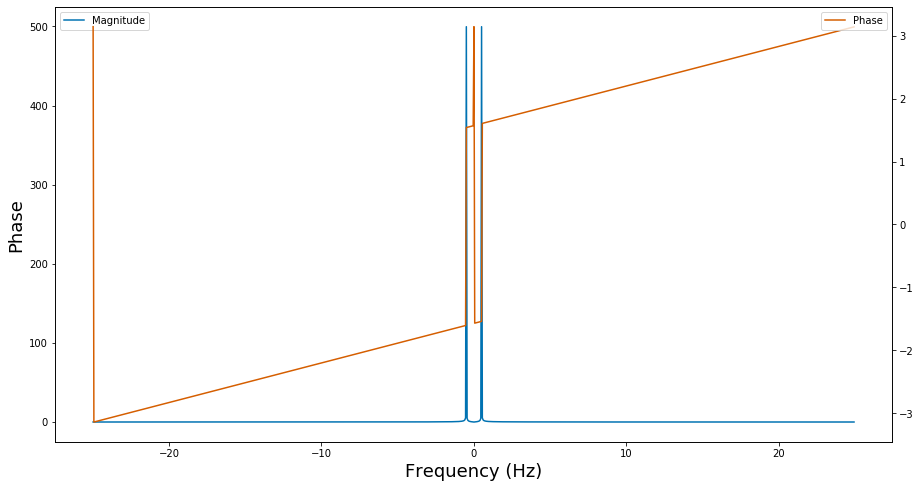

In [20]:
# Calculate frequency axis values
nsamples = x.size
interval = (x[-1] - x[0]) / (x.size - 1)
x_values = fftshift(fftfreq(nsamples, interval))

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
# ax.set_xlim((-3,3)) # Uncomment to focus on peaks
ax.plot(x_values, fftshift(np.abs(fy)), label="Magnitude")
ax.set_xlabel('Frequency (Hz)', fontdict=font)
ax.set_ylabel('Phase', fontdict=font)
ax.legend(loc=2)
ax_share = ax.twinx()
ax_share.plot(x_values, fftshift(np.angle(fy)), color='C2', label="Phase")
ax_share.legend(loc=1);

Finally, recalled that we used `ifft` and `ifftshift` in an example above. These functions simply perform the inverse operations to `fft` and `fftshift` and need to used to convert our frequency domain data back into time domain data.

## 2D FFTs

FFTs can be applied to multidimensional arrays using `scipy.fftpack.fftn`. To demonstrate, let's look at some synthetic examples.

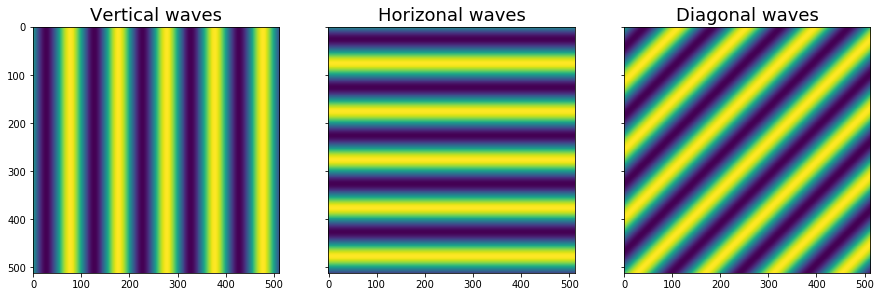

In [21]:
from skimage.transform import rotate

f = 1/100
image_size = 1000
x = np.linspace(0, image_size, image_size)
wave = np.sin(x * f * (2 * np.pi))

image0 = np.ones(image_size)[:,np.newaxis] * wave[np.newaxis,:]
image1 = np.ones(image_size)[np.newaxis,:] * wave[:,np.newaxis]
image2 = rotate(image1, 45)

image0 = image0[248:-240, 248:-240]
image1 = image1[248:-240, 248:-240]
image2 = image2[248:-240, 248:-240]

# Plot
fig, ax = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)
ax[0].imshow(image0)
ax[0].set_title('Vertical waves', fontdict=font)
ax[1].imshow(image1)
ax[1].set_title('Horizonal waves', fontdict=font)
ax[2].imshow(image2)
ax[2].set_title('Diagonal waves', fontdict=font);

Now lets look at the corresponding FFTs:

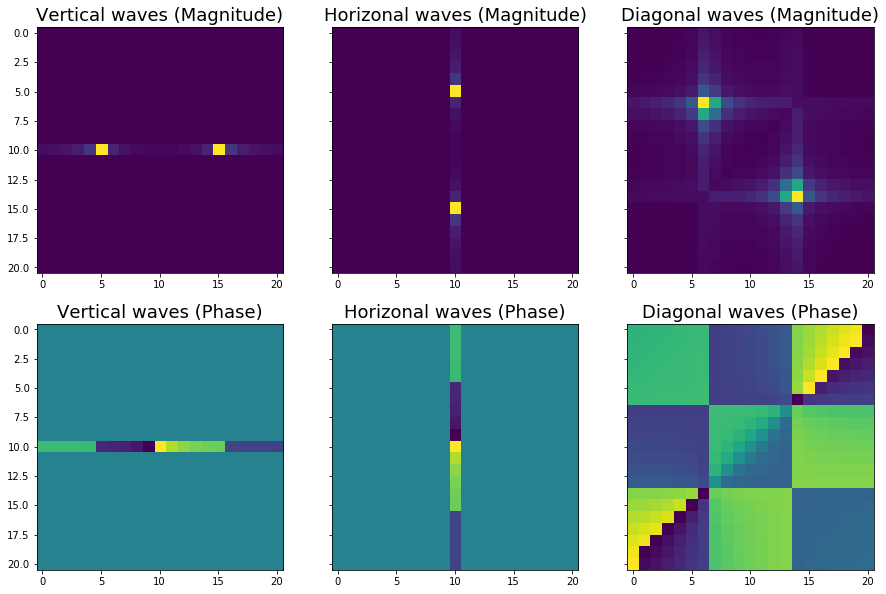

In [22]:
from scipy.fftpack import fftn

# Get magnitudes
image0_mag = np.abs(fftn(image0))
image0_mag = fftshift(image0_mag) # Remember why we use `fftshift`

image1_mag = np.abs(fftn(image1))
image1_mag = fftshift(image1_mag)

image2_mag = np.abs(fftn(image2))
image2_mag = fftshift(image2_mag)

# Get phases
image0_ph = np.angle(fftn(image0))
image0_ph = fftshift(image0_ph)

image1_ph = np.angle(fftn(image1))
image1_ph = fftshift(image1_ph)

image2_ph = np.angle(fftn(image2))
image2_ph = fftshift(image2_ph)


# Plots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10), sharey=True)

# Upper panels
ax[0,0].imshow(image0_mag[246:267, 246:267]) # Need to focus on the peaks
ax[0,0].set_title('Vertical waves (Magnitude)', fontdict=font)
ax[0,1].imshow(image1_mag[246:267, 246:267])
ax[0,1].set_title('Horizonal waves (Magnitude)', fontdict=font)
ax[0,2].imshow(image2_mag[246:267, 246:267])
ax[0,2].set_title('Diagonal waves (Magnitude)', fontdict=font)

# Lower panels
ax[1,0].imshow(image0_ph[246:267, 246:267]) # Need to focus on the peaks
ax[1,0].set_title('Vertical waves (Phase)', fontdict=font)
ax[1,1].imshow(image1_ph[246:267, 246:267])
ax[1,1].set_title('Horizonal waves (Phase)', fontdict=font)
ax[1,2].imshow(image2_ph[246:267, 246:267])
ax[1,2].set_title('Diagonal waves (Phase)', fontdict=font);


Here you can appreciate the the "peaks" for magnitude and phase are now visualized as spots of high intensity, with an orientation about the center of the frequency/phase image that reflects the orientation of the waves in the original image. As with our 1D examples, phase is difficult to interpret, but the magnitude images are clear.

Note that, because we used `fftshift`, the centers of the magnitude/phase images represent frequency 0, and higher frequencies are represented by the periphery of the magnitude/phase images.

You'll notice that, in the magnitude images, the spots are fairly sharp. This makes sense because the original images were just waves of a single frequency and orientation. Most real images don't look like this. Watch what happens with some more "natural" image features, like stripes:

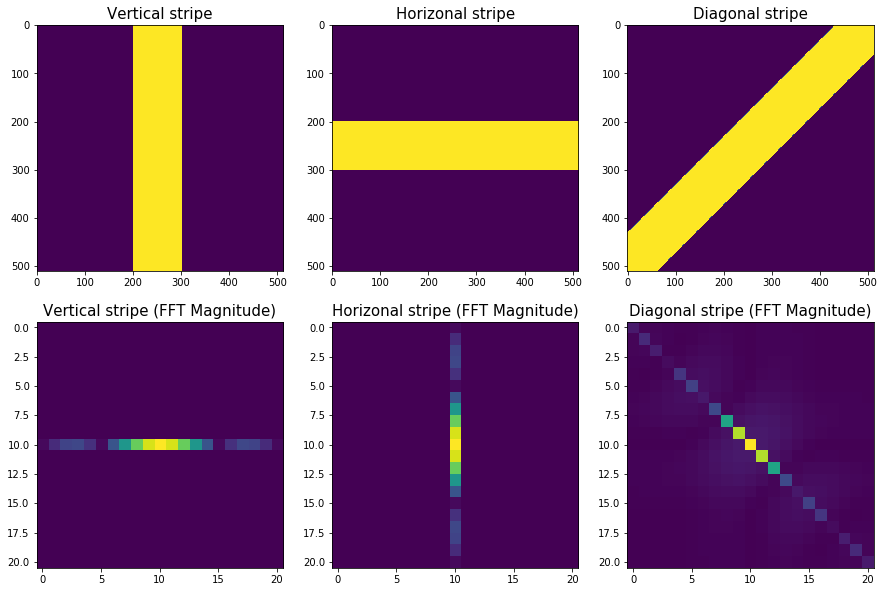

In [23]:
# Make the stripes
vertical_stripe = np.zeros((512,512))
vertical_stripe[:,200:300] = 1

horizontal_stripe = np.zeros((1000,1000))
horizontal_stripe[450:550, :] = 1

diagonal_stripe = rotate(horizontal_stripe, 45)

horizontal_stripe = horizontal_stripe[248:-240, 248:-240]
diagonal_stripe = diagonal_stripe[248:-240, 248:-240]

# FFT magnitudes

vs_fft = np.abs(fftn(vertical_stripe))
vs_fft = fftshift(vs_fft) 

hs_fft = np.abs(fftn(horizontal_stripe))
hs_fft = fftshift(hs_fft) 

ds_fft = np.abs(fftn(diagonal_stripe))
ds_fft = fftshift(ds_fft) 

# Plots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
font = {'size':15}

# Upper panels
ax[0,0].imshow(vertical_stripe) 
ax[0,0].set_title('Vertical stripe', fontdict=font)
ax[0,1].imshow(horizontal_stripe)
ax[0,1].set_title('Horizonal stripe', fontdict=font)
ax[0,2].imshow(diagonal_stripe)
ax[0,2].set_title('Diagonal stripe', fontdict=font)

# Lower panels
ax[1,0].imshow(vs_fft[246:267, 246:267]) 
ax[1,0].set_title('Vertical stripe (FFT Magnitude)', fontdict=font)
ax[1,1].imshow(hs_fft[246:267, 246:267])
ax[1,1].set_title('Horizonal stripe (FFT Magnitude)', fontdict=font)
ax[1,2].imshow(ds_fft[246:267, 246:267])
ax[1,2].set_title('Diagonal stripe (FFT Magnitude)', fontdict=font);

Here, you see that the frequency information is spread out from the origin, while the orientation is what you might expect. Why is this the case?

Remember that frequency domain values represent a wave -- a repeating oscillation that continues forever (like $ \sin x $). Thus when your original image is a wave, you will have a sharp peak in the frequency domain.

Now think about how you might go about creating edges or single objects by summing up sine waves. It can be quite complicated! Lets take a look at a 1D example of how to create a square wave:

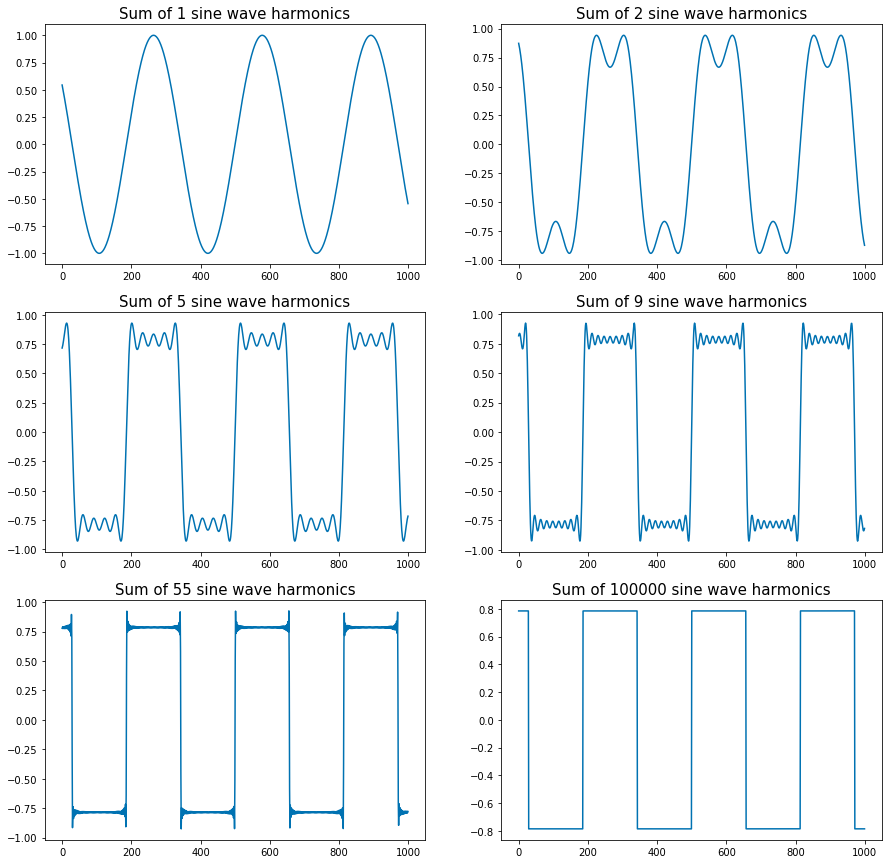

In [24]:
x = np.linspace(-10,10,1000)
harmonics = [1, 2, 5, 9, 55, 100000]

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
ax = axes.ravel()

for i, h in enumerate(harmonics):
    waves = [np.sin(i * x)/i for i in range(1, h * 2, 2)]
    sq_wave = np.sum(waves, axis=0)
    ax[i].plot(sq_wave)
    ax[i].set_title(f'Sum of {h} sine wave harmonics', fontdict=font)
    

So you can see that edges, which are discontinues, require information spread across many frequencies. Edges will therefore show up as lines in the magnitude of the FFT, where the orientation of the line is perpendicular to the edge.

Let us now look at the FFT of a real image:

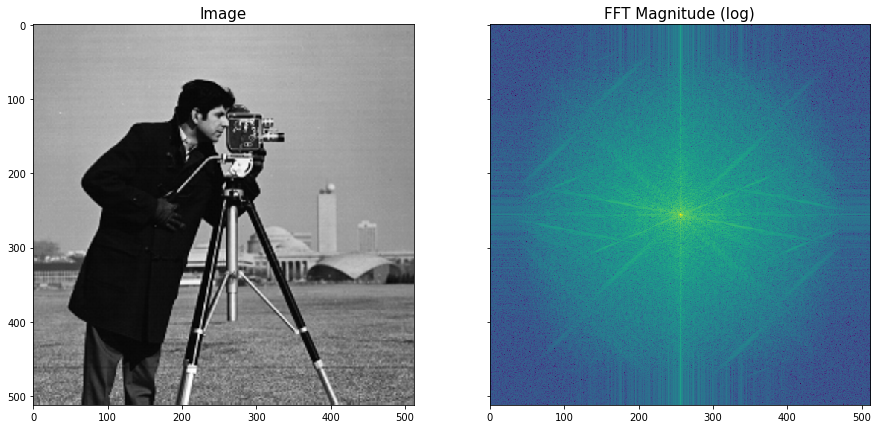

In [41]:
from skimage.data import camera
from skimage.color import rgb2gray

image = rgb2gray(camera()) # get image

im_fft_mag = np.abs(fftshift(fftn(image))) # get fft magnitude


# Plot
fig, ax = plt.subplots(ncols=2, figsize=(15, 10), sharey=True)
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image', fontdict=font)
ax[1].imshow(np.log(im_fft_mag)) # Notice the log transform!
ax[1].set_title('FFT Magnitude (log)', fontdict=font);


Notice that we are looking at the log of the FFT magnitudes on the image on the right. This is because the dynamic range of a typical "real image" FFT is very high, and most of the intensity is very close to the origin. If you try to view the FFT magnitude without the log transformation, it will basically look like a small dot in the center and nothing else.

In the log-transformed FFT image, we can see evidence of many different edges at various orientations bursting out like rays from the center. Can you guess which edges in the original image are responsible for the FFT rays?

## Challenges

1. Load the slide scan data we used in lesson 1 and convert it to grayscale. Now take the FFT and plot both the image and the FFT magnitude.

```python
# Hint
from skimage import io
from skimage.color import rgb2gray

image = io.imread('../data/bear_kidney.png')
image = rgb2gray(image)```

    
2. How does the FFT of the cells look different from the `camera` image we looked at above? Why?
3. Apply a gaussian filter to the image (`skimage.filters.gaussian`). What happens to the FFT magnitude? Why?
4. Look at the FFT magnitude of the original `moonlanding.png` example from lesson 1. What do you think is going on with the image?

```python
# Hint
image = io.imread('../data/moonlanding.png')
```


## Solutions

### Challenge 1 solution

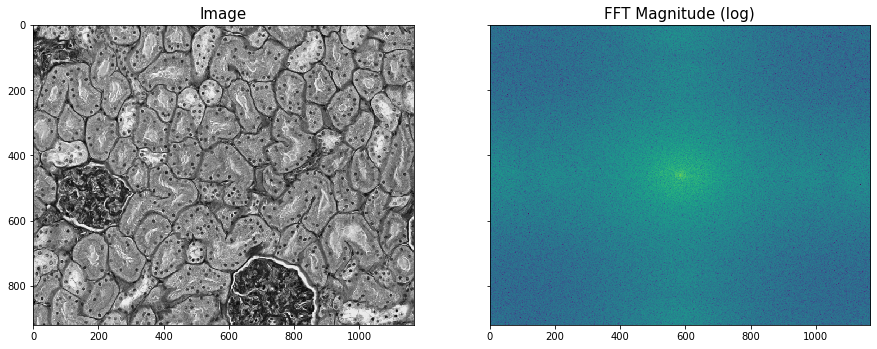

In [49]:
from skimage import io
from skimage.color import rgb2gray
image = io.imread('../data/bear_kidney.png')
image = rgb2gray(image)
im_fft = fftshift(fftn(image))

im_fft_mag = np.abs(im_fft)

# Plot
fig, ax = plt.subplots(ncols=2, figsize=(15, 10), sharey=True)
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image', fontdict=font)
ax[1].imshow(np.log(im_fft_mag)) # Notice the log transform!
ax[1].set_title('FFT Magnitude (log)', fontdict=font);


### Challenge 2 solution

 - The FFT magnitude image does not show clear evidence of edges. This makes sense, as we are looking at a picture of round cells.

### Challenge 3 solution

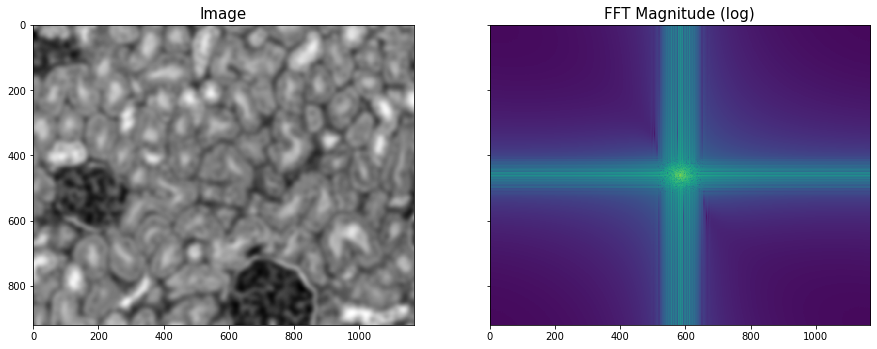

In [56]:
from skimage.filters import gaussian
blurred_image = gaussian(image, 8)

bl_im_fft = fftshift(fftn(blurred_image))
bl_im_fft_mag = np.abs(bl_im_fft)

# Plot
fig, ax = plt.subplots(ncols=2, figsize=(15, 10), sharey=True)
ax[0].imshow(blurred_image, cmap='gray')
ax[0].set_title('Image', fontdict=font)
ax[1].imshow(np.log(bl_im_fft_mag)) 
ax[1].set_title('FFT Magnitude (log)', fontdict=font);


 - The high frequency information is reduced/eliminated by the gaussian filter, so the periphery of the FFT magnitude image is concordantly reduced.
 - (**Bonus points**) The remaining vertical/horizonal stripes in the FFT magnitude are caused in part by the edges of the image itself!

### Challenge 4 solution

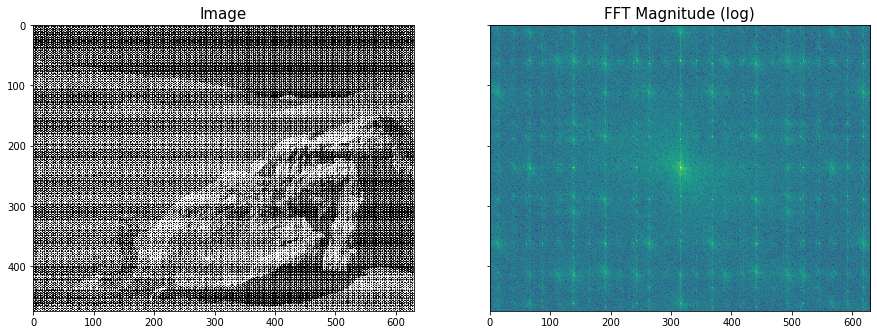

In [67]:
image = io.imread('../data/moonlanding.png')
im_fft = fftshift(fftn(image))

im_fft_mag = np.abs(im_fft)

# Plot
fig, ax = plt.subplots(ncols=2, figsize=(15, 10), sharey=True)
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image', fontdict=font)
ax[1].imshow(np.log(im_fft_mag)) # Notice the log transform!
ax[1].set_title('FFT Magnitude (log)', fontdict=font);

 - Based on the FFT, it appears that the original `moonlanding.png` image is corrupted by a signal artifact consisting of a regular pattern, visible as frequency "spikes" in the FFT magnitude.